In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
sklearn.__version__

'1.0.2'

In [2]:
data = pd.read_csv('data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Exploratory data analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## let's fill Null values but we can remove that null value rows also because there is not much null rows


In [5]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [6]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [7]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
data.drop('id', axis=1, inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Outlier Removation

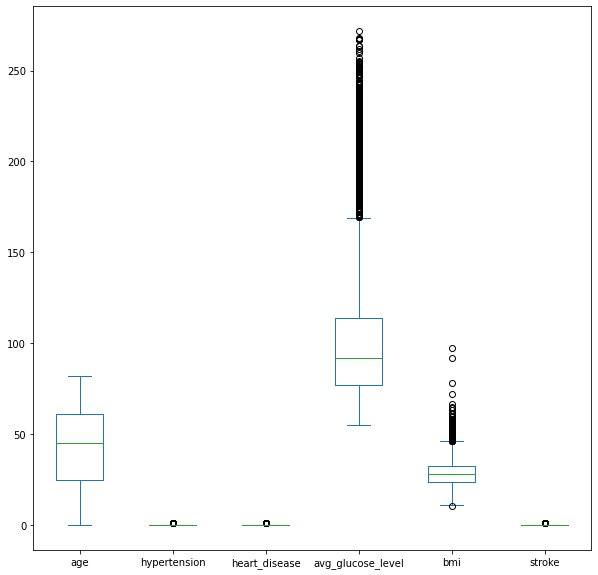

In [9]:
plt.rcParams['figure.figsize'] = (10,10)
data.plot(kind='box')
plt.show()

In [10]:
data['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [11]:
# Avg_glucose_level has big outliers and 75% data is have 114.090000  avg_glucose_level   ...   So, we can remove >114.090000 Avg_glucose_level  or we can keep it also
# Decision  :  keep
data[data['avg_glucose_level'] > 114.090000]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5071,Male,81.0,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5076,Female,34.0,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5086,Female,51.0,0,0,Yes,Private,Urban,152.56,21.800000,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0


In [12]:
data['avg_glucose_level'].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

## Lable Encoding

In [13]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [14]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [16]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()


In [17]:
gender = enc.fit_transform(data['gender'])
smoking_status = enc.fit_transform(data['smoking_status'])
work_type = enc.fit_transform(data['work_type'])
ever_married = enc.fit_transform(data['ever_married'])
Residence_type = enc.fit_transform(data['Residence_type'])

In [18]:
data['gender'] = gender
data['smoking_status'] = smoking_status
data['work_type'] = work_type
data['ever_married'] = ever_married
data['Residence_type'] = Residence_type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


In [19]:
data
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [20]:
from imblearn.over_sampling import SMOTENC
# smote = SMOTE(random_state = 101)
# X, y = smote.fit_resample(data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
#        'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
#        'smoking_status']],data['stroke'])
# print(X)
# #Creating a new Oversampling Data Frame
# df_oversampler = pd.DataFrame(X, columns=data['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
#        'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
#        'smoking_status'])
# df_oversampler['stroke']

# sns.countplot(df_oversampler['stroke'])

# smotenc = SMOTENC([0,4,5,6,9],random_state = 101)
# data_oversampled = smotenc.fit_resample(data)

## Splitting the data for train and test

In [ ]:
x = 

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 102)
y_train

NameError: name 'x' is not defined

## Normalization

In [ ]:
data.describe()

In [ ]:
# Here we can see that the difference between mean,std of columns is big that's why we have to scale it down because our model can't travel that much...

## In decision tree and Random forest we don't need to give standerized data x_train_std because they didn't work on distance  but Logistic regression and Knn works on distance so, we have to apply standerized data

from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [ ]:
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

## let's save the scaler object

In [ ]:
import pickle
import os

In [ ]:
scaler_path = os.path.join('C:/Users/Bhargav Patel/OneDrive/Desktop/ALL Other folders/ML and Data science projects/Data-Science/stroke prediction/', 'models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [ ]:
x_train_std

In [ ]:
x_test_std

# Training

## (1) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_std, y_train)

In [ ]:
# It's shows the importances of the columns which are displyed below
dt.feature_importances_

In [ ]:
x_train.columns

In [ ]:
y_pred = dt.predict(x_test_std)

In [ ]:
from sklearn.metrics import accuracy_score
ac_dt = accuracy_score(y_test, y_pred)
ac_dt

In [ ]:
import joblib
model_path = os.path.join('C:/Users/Bhargav Patel/OneDrive/Desktop/ALL Other folders/ML and Data science projects/Data-Science/stroke prediction/', 'models/dt.sav')
joblib.dump(dt,model_path)

## (2) Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_std, y_train)

In [ ]:
y_pred_lr = lr.predict(x_test_std)
ac_lr = accuracy_score(y_test,y_pred_lr)
ac_lr

In [ ]:
sklearn.metrics.f1_score(y_test,y_pred_lr)

## (3) KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_std, y_train)

In [ ]:
y_pred = knn.predict(x_test_std)

In [ ]:
ac_knn = accuracy_score(y_test, y_pred)

In [ ]:
ac_knn

##  (4) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train_std, y_train)

In [ ]:
y_pred = rf.predict(x_test_std)

In [ ]:
ac_rf = accuracy_score(y_test, y_pred)
ac_rf

## (5) SVM

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train_std, y_train)

In [ ]:
y_pred = sv.predict(x_test_std)

In [ ]:
ac_svm = accuracy_score(y_test,y_pred)
ac_svm

In [ ]:
ac_lr

In [ ]:
ac_knn

In [ ]:
ac_dt

In [ ]:
ac_rf

In [ ]:
## plt.bar(x , y)
plt.bar(['Decision Tree', 'Logistic','KNN' ,'Random Forest', 'SVM'], [ac_dt, ac_lr, ac_knn, ac_rf, ac_svm])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()